# **1.Reading DATA:**

**ce code est utilisé pour connecter Google Drive à l'environnement Google Colab afin de faciliter l'accès aux fichiers stockés sur Google Drive lors de l'exécution du code dans un cahier Colab.**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import zipfile
import os

# Provide the paths to the ZIP files for each category
zip_files = [
  '/content/drive/MyDrive/articles-sports.zip',
    '/content/drive/MyDrive/articles-culture.zip',
    '/content/drive/MyDrive/articles-local.zip',
    '/content/drive/MyDrive/articles-religion.zip',
    '/content/drive/MyDrive/articles-economy.zip',
    '/content/drive/MyDrive/articles-international.zip'
]

In [ ]:
# List to store DataFrames for each category
all_dfs = []

# Function to read articles from a zip file into a DataFrame for a specific category
def read_category_into_dataframe(zip_file, target_category):
    with zipfile.ZipFile(zip_file, 'r') as archive:
        file_names = [name for name in archive.namelist() if name.startswith(target_category) and name.endswith('.txt')]
        if not file_names:
            print(f"No matching files found for '{target_category}' in the ZIP file.")
            return None

        articles = []
        for file_name in file_names:
            with archive.open(file_name) as file:
                articles.append(file.read().decode('utf-8'))  # Adjust the decoding based on your file format
        # Create a DataFrame for the category
        df = pd.DataFrame({'Category': target_category, 'Article': articles})
        return df

# Loop through each ZIP file
for zip_file_path in zip_files:
    category_name = os.path.basename(zip_file_path).replace('articles-', '').replace('.zip', '')  # Extract category name
    df = read_category_into_dataframe(zip_file_path, f'articles{category_name.capitalize()}')

    if df is not None:
        # Display the resulting dataframe
        print(f"{category_name.capitalize()} DataFrame Info:")
        print(df.info())
        print(df.head())

        # Append the DataFrame to the list
        all_dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)

# Display the resulting combined dataframe
print("Combined DataFrame Info:")
print(combined_df.info())
print(combined_df.head(-10))

Sports DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  4095 non-null   object
 1   Article   4095 non-null   object
dtypes: object(2)
memory usage: 64.1+ KB
None
         Category                                            Article
0  articlesSports  اتحاد\r\nالكرة\r\nيتلقى\r\nدعوة\r\nمن\r\nاللجن...
1  articlesSports  يكثف\r\nاتحاد\r\nالعاب\r\nالقوى\r\nحاليا\r\nات...
2  articlesSports  تدخل\r\nاليوم\r\nأندية\r\nالدرجة\r\nالثانية\r\...
3  articlesSports  قمة\r\nصلالة\r\nإذا\r\nكانت\r\nهناك\r\nقمة\r\n...
4  articlesSports  فنجاء\r\nصحار\r\nمباراة\r\nفنجاء\r\nوصحار\r\nل...
Culture DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2495 non-null   object
 1   Article   

**ce script extrait les articles des fichiers ZIP, les combine en un seul texte par catégorie, puis écrit ce texte dans un fichier texte. Les données résultantes sont ensuite stockées dans un DataFrame Pandas pour une analyse ultérieure.**

In [ ]:
# Function to read articles from a zip file and write them to a text file for a specific category
def write_category_to_text(zip_file, target_category, output_folder='/content/drive/MyDrive/ML/'):
    with zipfile.ZipFile(zip_file, 'r') as archive:
        file_names = [name for name in archive.namelist() if name.startswith(target_category) and name.endswith('.txt')]
        if not file_names:
            print(f"No matching files found for '{target_category}' in the ZIP file.")
            return

        articles = []
        for file_name in file_names:
            with archive.open(file_name) as file:
                articles.append(file.read().decode('utf-8'))  # Adjust the decoding based on your file format

        # Combine articles into a single text
        combined_text = '\n'.join(articles)

        # Write the combined text to a file
        output_file_path = os.path.join(output_folder, f'{target_category}.txt')
        with open(output_file_path, 'w', encoding='utf-8') as output_file:
            output_file.write(combined_text)

        print(f"Combined text for '{target_category}' written to: {output_file_path}")
        return {'Category': target_category, 'Content': combined_text}

# Create a list to store the data for each category
data_list = []

# Loop through each ZIP file
for zip_file_path in zip_files:
    category_name = os.path.basename(zip_file_path).replace('articles-', '').replace('.zip', '')  # Extract category name
    category_data = write_category_to_text(zip_file_path, f'articles{category_name.capitalize()}')
    if category_data:
        data_list.append(category_data)

# Create a DataFrame from the list of category data
df = pd.DataFrame(data_list)

# Display the resulting dataframe
print("Combined DataFrame Info:")
print(df.info())
print(df.head(6))

Combined text for 'articlesSports' written to: /content/drive/MyDrive/ML/articlesSports.txt
Combined text for 'articlesCulture' written to: /content/drive/MyDrive/ML/articlesCulture.txt
Combined text for 'articlesLocal' written to: /content/drive/MyDrive/ML/articlesLocal.txt
Combined text for 'articlesReligion' written to: /content/drive/MyDrive/ML/articlesReligion.txt
Combined text for 'articlesEconomy' written to: /content/drive/MyDrive/ML/articlesEconomy.txt
Combined text for 'articlesInternational' written to: /content/drive/MyDrive/ML/articlesInternational.txt
Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  6 non-null      object
 1   Content   6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes
None
                Category                                            Content
0         articlesSports 

# **2.DATA Exploration:**

**ce script télécharge des mots arabes vides depuis NLTK, les combine avec une liste personnalisée de mots arabes vides, puis affiche le nombre total d'éléments dans l'ensemble combiné. Cet ensemble est souvent utilisé dans le traitement du langage naturel pour filtrer les mots communs qui n'ont généralement pas beaucoup de sens dans l'analyse textuelle.**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words_arabic = set([
    'في', 'من', 'عن', 'على', 'إلى', 'إلا', 'عدا', 'مع', 'لم', 'لن', 'بما', 'بماذا',
    'مما', 'مماذا', 'إذا', 'أين', 'منذ', 'لذا', 'ولكن', 'بل', 'ثم', 'أو', 'أم',
    'هل', 'لماذا', 'كيف', 'كم', 'ماذا', 'ما', 'هذا', 'هذه', 'هؤلاء', 'هنا', 'هناك',
    'هنالك', 'هنالكم', 'هنالكن', 'هاتان', 'هاته', 'هاتين', 'هاكم', 'هاكن', 'هاهنا',
    'في', 'من', 'عن', 'على', 'إلى', 'إلا', 'عدا', 'مع', 'لم', 'لن', 'بما', 'بماذا',
    'حول','كثير','عنه','امام','اما','!','في','كانت','و','و','او','لها','على','هي','بعض','فيه','وهو','إن','قد','قبل','ومن','به',',','فيها','بها','حتى','-','له','ولا','بعد','هو','حيث','بين','كما','كان','كل','عليه','الذي','لا','على',':','(',')','أن','التي','من','في','.','في','كانت','و','و','او','وفي','بن','فى','ان','خلال','الى','وقد','هذان', 'ذا', 'ذه', 'ذان', 'ذو', 'ذي', 'ذلك', 'ذلكم', 'ذلكن'
])

stop = set(nltk.corpus.stopwords.words("arabic"))
stop = stop.union(stop_words_arabic)

In [ ]:
print(f'The number of elements in the "stop" set of the package nltk is: {len(stop)}')
print(f'The number of elements in the "stop_words_arabic" set is: {len(stop_words_arabic)}')

The number of elements in the "stop" set of the package nltk is: 729
The number of elements in the "stop_words_arabic" set is: 101


**2.1.Counting the Number of Words:**

In [ ]:
from nltk.tokenize import word_tokenize

df['Word_Count'] = df['Content'].apply(lambda text: len(text.split('\r\n')))

# Total number of words in the dataset
total_words = df['Word_Count'].sum()
print(f"Total number of words in the dataset: {total_words}")

Total number of words in the dataset: 9413772


**ce script compte le nombre total de mots dans une colonne 'Contenu' d'un DataFrame en utilisant la tokenisation NLTK, puis affiche ce nombre total de mots.**

**2.2.Counting the Number of Characters:**

**ce script compte le nombre total de caractères dans une colonne "Contenu" d'un DataFrame, affiche ce nombre total de caractères, puis montre les six premières lignes du DataFrame à titre d'exemple.**

In [ ]:
# Total number of characters in the dataset
df['Character_Count'] = df['Content'].apply(len)
total_characters = df['Character_Count'].sum()
print(f"Total number of characters in the dataset: {total_characters}")
df.head(6)

Total number of characters in the dataset: 61885432


,Category,Content,Word_Count,Character_Count
0,articlesSports,اتحاد\r\nالكرة\r\nيتلقى\r\nدعوة\r\nمن\r\nاللجن...,1388149,9232840
1,articlesCulture,كتب\r\nسالم\r\nالرحبي\r\n:\r\nتنطلق\r\nاليوم\r...,1344069,8830574
2,articlesLocal,ان\r\nتشجيع\r\nعادة\r\nالمشي\r\nوبذل\r\nالجهد\...,1484587,10336787
3,articlesReligion,يقول\r\nالله\r\nتبارك\r\nوتعالى\r\n(\r\nواضرب\...,2972638,18369765
4,articlesEconomy,عقد\r\nمجلس\r\nالشورى\r\nصباح\r\nامس\r\nاعمال\...,1472514,10119923
5,articlesInternational,الرباط\r\nمن\r\nسعيد\r\nبونوار\r\nعواصم\r\nوكا...,751815,4995543


**2.3.The average number of characters per word.**

**ce script calcule et affiche le nombre moyen de caractères par mot dans un ensemble de données. Cela peut être utile pour comprendre la longueur moyenne des mots dans un texte.**



**ce script ajoute des colonnes au DataFrame pour la longueur moyenne des mots et la fréquence des mots vides, puis trie le DataFrame en fonction du nombre total de mots par ordre décroissant et affiche les six premières lignes pour analyse.**

In [ ]:
# Text length analysis
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

df['avg_char_per_word'] = df['Content'].apply(lambda x: avg_word(x))
df['stopwords'] = df['Content'].apply(lambda x: len([x for x in x.split() if x in stop]))
df = df.sort_values(by='Word_Count',ascending=[0])
df.head(6)

,Category,Content,Word_Count,Character_Count,avg_char_per_word,stopwords
3,articlesReligion,يقول\r\nالله\r\nتبارك\r\nوتعالى\r\n(\r\nواضرب\...,2972638,18369765,4.178451,976625
2,articlesLocal,ان\r\nتشجيع\r\nعادة\r\nالمشي\r\nوبذل\r\nالجهد\...,1484587,10336787,4.960561,347238
4,articlesEconomy,عقد\r\nمجلس\r\nالشورى\r\nصباح\r\nامس\r\nاعمال\...,1472514,10119923,4.870336,353397
0,articlesSports,اتحاد\r\nالكرة\r\nيتلقى\r\nدعوة\r\nمن\r\nاللجن...,1388149,9232840,4.648244,344488
1,articlesCulture,كتب\r\nسالم\r\nالرحبي\r\n:\r\nتنطلق\r\nاليوم\r...,1344069,8830574,4.568180,384081
5,articlesInternational,الرباط\r\nمن\r\nسعيد\r\nبونوار\r\nعواصم\r\nوكا...,751815,4995543,4.642408,209407


**ce script crée un graphique à barres illustrant le nombre total de mots pour chaque catégorie dans un DataFrame en utilisant les bibliothèques Matplotlib et Seaborn. Cette visualisation peut être utile pour comparer la longueur des textes entre différentes catégories.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

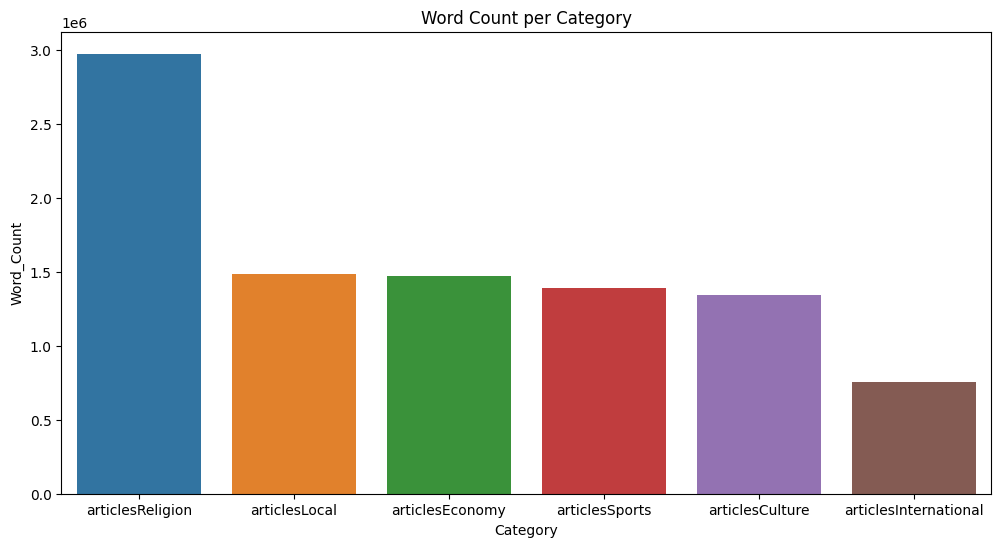

In [ ]:
# Plot Word_Count for each category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Word_Count', data=df)
plt.title('Word Count per Category')
plt.show()

**ce script crée un diagramme à barres illustrant le nombre total de caractères pour chaque catégorie dans un DataFrame en utilisant les bibliothèques Matplotlib et Seaborn. Cette visualisation peut être utile pour comparer la longueur des textes en termes de nombre total de caractères entre différentes catégories.**

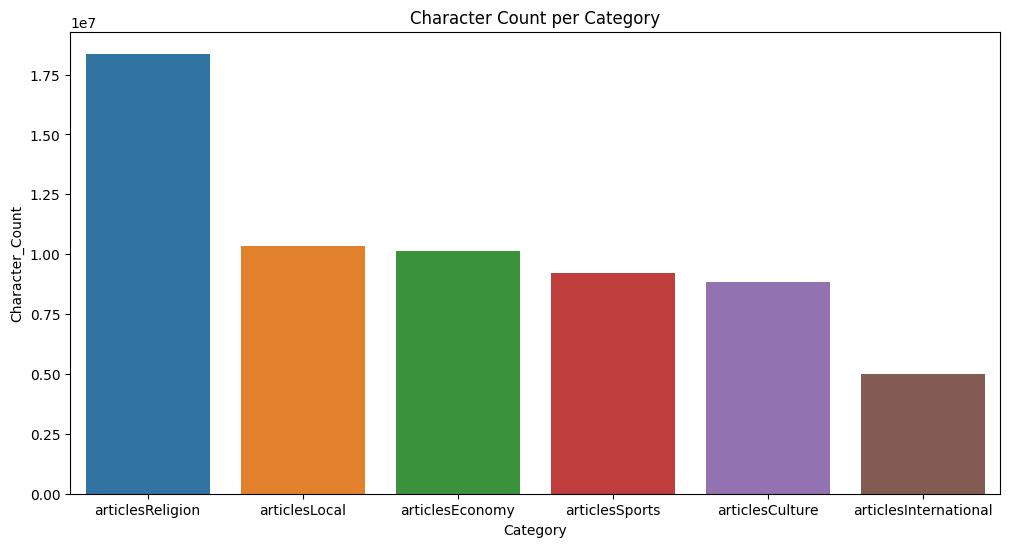

In [ ]:
# Plot Character_Count for each category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Character_Count', data=df)
plt.title('Character Count per Category')
plt.show()

**Ce script crée un graphique à barres illustrant le nombre moyen de caractères par mot pour chaque catégorie dans un DataFrame en utilisant les bibliothèques Matplotlib et Seaborn. Cette visualisation peut être utile pour comparer la longueur moyenne des mots entre différentes catégories.**

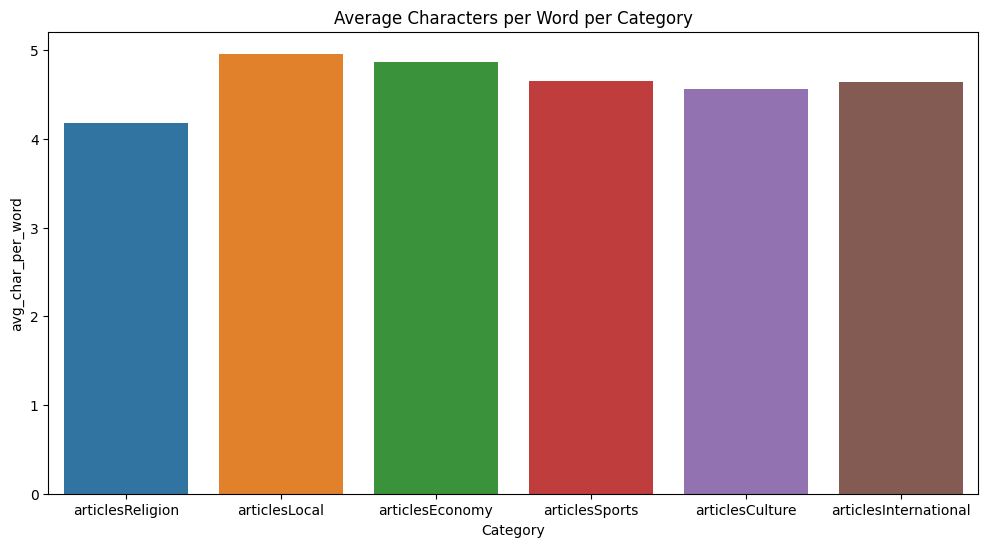

In [ ]:
# Plot avg_char_per_word for each category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='avg_char_per_word', data=df)
plt.title('Average Characters per Word per Category')
plt.show()

**ce script crée un graphique à barres illustrant le nombre de mots vides pour chaque catégorie dans un DataFrame en utilisant les bibliothèques Matplotlib et Seaborn. Cette visualisation peut être utile pour comparer la fréquence des mots vides entre différentes catégories.**

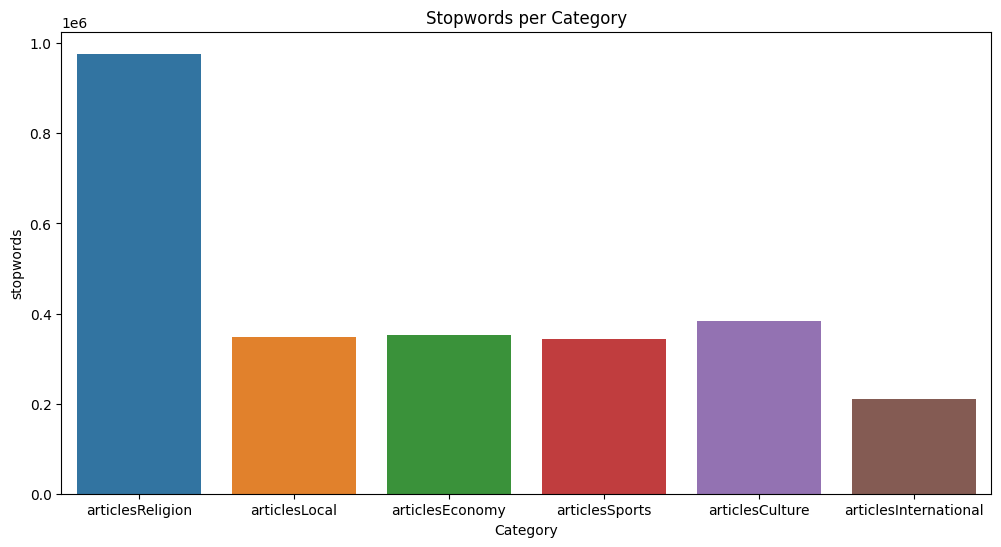

In [ ]:
# Plot stopwords per category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='stopwords', data=df)
plt.title('Stopwords per Category')
plt.show()

Ce code utilise la bibliothèque scikit-learn (sklearn) pour créer une représentation TF-IDF (Term Frequency-Inverse Document Frequency) à partir des documents contenus dans la colonne 'Content' d'un DataFrame avant suppression des mots vide .

In [ ]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
from zipfile import ZipFile


# Liste des chemins vers les fichiers zip
chemins_fichiers_zip = [
    '/content/drive/MyDrive/articles-sports.zip',
    '/content/drive/MyDrive/articles-culture.zip',
    '/content/drive/MyDrive/articles-local.zip',
    '/content/drive/MyDrive/articles-religion.zip',
    '/content/drive/MyDrive/articles-economy.zip',
    '/content/drive/MyDrive/articles-international.zip'
]

# Dictionnaire pour stocker le contenu de chaque catégorie
contenu_par_categorie = {}

# Boucler à travers les fichiers zip et extraire le contenu
for chemin_fichier_zip in chemins_fichiers_zip:
    # Vérifier l'existence du fichier zip
    if os.path.exists(chemin_fichier_zip):
        # Dossier temporaire pour extraire les fichiers du zip
        dossier_temporaire = '/content/dossier_temporaire'

        # Extraire le fichier zip dans le dossier temporaire
        with ZipFile(chemin_fichier_zip, 'r') as zip_ref:
            zip_ref.extractall(dossier_temporaire)

        # Catégorie correspondant au chemin du fichier zip
        categorie = os.path.basename(chemin_fichier_zip).replace('.zip', '')

        # Liste pour stocker le contenu de chaque fichier de la catégorie
        contenu_fichiers = []

        # Fonction pour récursivement parcourir les fichiers texte
        def parcourir_dossiers(chemin_dossier):
            for fichier in os.listdir(chemin_dossier):
                chemin_fichier = os.path.join(chemin_dossier, fichier)
                if os.path.isfile(chemin_fichier) and fichier.endswith('.txt'):
                    with open(chemin_fichier, 'r', encoding='utf-8') as file:
                        contenu_fichier = file.read()
                        contenu_fichiers.append(contenu_fichier)
                elif os.path.isdir(chemin_fichier):
                    parcourir_dossiers(chemin_fichier)

        # Appeler la fonction pour parcourir les fichiers texte
        parcourir_dossiers(dossier_temporaire)

        # Ajouter le contenu à la catégorie correspondante dans le dictionnaire
        contenu_par_categorie[categorie] = contenu_fichiers

        # Supprimer le dossier temporaire et son contenu
       # os.rmdir(dossier_temporaire)
    else:
        print(f"Le fichier zip spécifié n'existe pas : {chemin_fichier_zip}")

# Calculer les mots les plus fréquents pour chaque catégorie
mots_frequents_par_categorie = {}
for categorie, contenu in contenu_par_categorie.items():
    vectorizer = TfidfVectorizer(min_df=1)
    tfidf_matrix = vectorizer.fit_transform(contenu)
    feature_names = np.array(vectorizer.get_feature_names_out())
    indices_mots_frequents = np.argsort(-tfidf_matrix.sum(axis=0))[:, :10]
    mots_frequents = set(feature_names[i] for i in indices_mots_frequents.tolist()[0])
    mots_frequents_par_categorie[categorie] = mots_frequents

# Trouver l'intersection des mots les plus fréquents dans toutes les catégories
mots_frequents_intersection = set.intersection(*mots_frequents_par_categorie.values())

# Afficher les mots les plus fréquents dans l'intersection
print(f'Mots les plus fréquents dans l\'intersection de toutes les catégories : {mots_frequents_intersection}')

Mots les plus fréquents dans l'intersection de toutes les catégories : {'على', 'في', 'من', 'ان', 'التي', 'الى'}


ce script génère un diagramme à barres représentant les 10 mots les plus fréquents dans la colonne "Contenu" du DataFrame, en utilisant les poids TF-IDF avant suppresion des mots vide (stop word)pour mesurer l'importance des mots.

In [ ]:
!pip install arabic-reshaper python-bidi pandas scikit-learn matplotlib

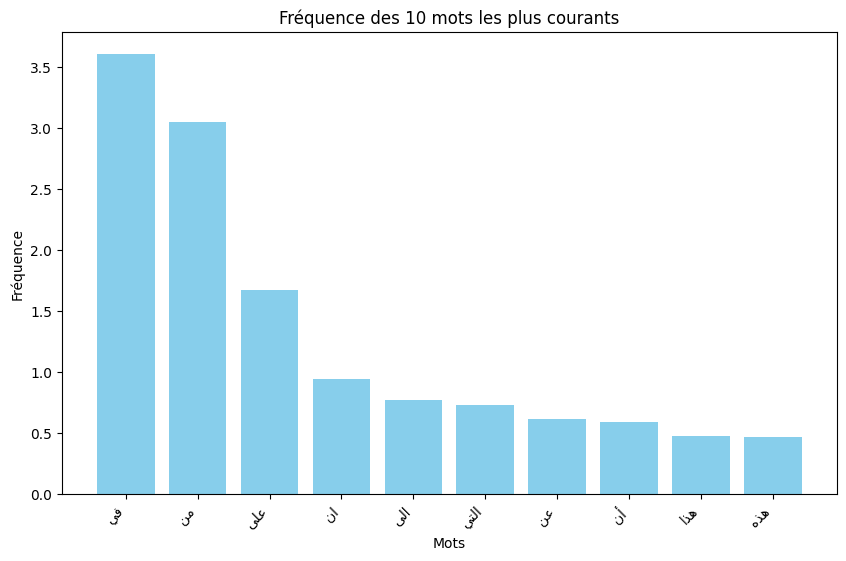

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape



# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF to the 'Content' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Content'])

# Convert the TF-IDF matrix to a DataFrame for better exploration
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calculate word frequencies
word_frequencies = tfidf_df.sum().sort_values(ascending=False)

# Select the top 10 words
top_10_words = word_frequencies.head(10)

# Reshape and display Arabic text
reshaped_words = [get_display(reshape(word)) for word in top_10_words.index]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(reshaped_words, top_10_words, color='skyblue')
plt.title('Fréquence des 10 mots les plus courants')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.show()

# **3.Data Preprocessing:**

We perform basic text preprocessing steps including the following:


**3.1.Tokenization:**


Ce script utilise NLTK pour symboliser le contenu d'une colonne "Contenu" dans un DataFrame, en créant une nouvelle colonne "Contenu tokenisé" contenant le texte symbolisé. Le DataFrame est ensuite affiché pour vérification visuelle.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize the 'Content' column and create a new 'Tokenized_Content' column
df['Tokenized_Content'] = df['Content'].apply(lambda text: nltk.word_tokenize(str(text)))

# Display the DataFrame with the new 'Tokenized_Content' column
print(df[['Content', 'Tokenized_Content']])

                                             Content  \
3  يقول\r\nالله\r\nتبارك\r\nوتعالى\r\n(\r\nواضرب\...   
2  ان\r\nتشجيع\r\nعادة\r\nالمشي\r\nوبذل\r\nالجهد\...   
4  عقد\r\nمجلس\r\nالشورى\r\nصباح\r\nامس\r\nاعمال\...   
0  اتحاد\r\nالكرة\r\nيتلقى\r\nدعوة\r\nمن\r\nاللجن...   
1  كتب\r\nسالم\r\nالرحبي\r\n:\r\nتنطلق\r\nاليوم\r...   
5  الرباط\r\nمن\r\nسعيد\r\nبونوار\r\nعواصم\r\nوكا...   

                                   Tokenized_Content  
3  [يقول, الله, تبارك, وتعالى, (, واضرب, لهم, مثل...  
2  [ان, تشجيع, عادة, المشي, وبذل, الجهد, البدني, ...  
4  [عقد, مجلس, الشورى, صباح, امس, اعمال, الجلسة, ...  
0  [اتحاد, الكرة, يتلقى, دعوة, من, اللجنة, التنظي...  
1  [كتب, سالم, الرحبي, :, تنطلق, اليوم, الدورة, ا...  
5  [الرباط, من, سعيد, بونوار, عواصم, وكالات, :, ق...  


**ce script extrait un sous-ensemble du texte original de la colonne "Contenu" et l'affiche, puis extrait un sous-ensemble des tokens (mots) de la colonne "Contenu tokenisé" et les affiche également. Cela vous permet de vérifier visuellement à quoi ressemble le texte original et comment il a été tokenisé.**

In [ ]:
original_text_subset = df['Content'].iloc[0]
# Display only the first few lines
print("Original Text:")
print(original_text_subset[:60])

row_index = 0  # Replace 0 with the appropriate row index
tokens = df.at[row_index, 'Tokenized_Content']
tokens_subset = tokens[:10]

# Display the first few tokens
print("\nTokens:")
print(tokens_subset)

Original Text:
يقول
الله
تبارك
وتعالى
(
واضرب
لهم
مثلا
اصحاب
القري

Tokens:
['اتحاد', 'الكرة', 'يتلقى', 'دعوة', 'من', 'اللجنة', 'التنظيمية', '2', 'اتحاد', 'القوى']


**3.2.Stop Words Removal:**

ce script prend la colonne "Contenu" d'un DataFrame, transforme chaque texte en mots, supprime les mots vides, puis remplace la colonne "Contenu" d'origine par le nouveau texte transformé en mots vides et dépourvu de mots vides. Les six premières lignes du DataFrame après ces transformations sont alors affichées

In [ ]:
df['clean_content'] = df['Content'].apply(lambda text: ' '.join([word for word in word_tokenize(str(text)) if word.lower() not in stop]))

ce script compte le nombre de mots d'arrêt dans la colonne 'Contenu' d'un DataFrame après la tokenisation et la suppression des mots d'arrêt. La somme totale de ces mots vides est ensuite affichée. Cela peut être utile pour évaluer l'efficacité de la suppression des mots vides dans le traitement du texte.

In [ ]:
Stopwords_Count= df['clean_content'].apply(lambda text: sum(1 for word in word_tokenize(str(text)) if word.lower() in stop))
print('stop words after remove = ',Stopwords_Count.sum())

stop words after remove =  0


In [ ]:
import re
def remove_numbers(text):
    return re.sub(r'\d+', '', text)  # Using regex to remove all numeric characters

# Apply the function to create the 'clean_content_no_numbers' column
df['clean_content_'] = df['clean_content'].apply(remove_numbers)

**3.3.Normalization:**

Ce script normalise le texte arabe en supprimant les répétitions de caractères, en normalisant certaines formes de lettres et en supprimant les signes diacritiques. Cela peut être utile pour normaliser la représentation du texte arabe dans le traitement du langage naturel.

In [ ]:
import re

def normalize_arabic_text(text):
    # Remove three or more repetitions of any character
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    text = pattern.sub(r"\1\1", text)

    # Normalize alif
    text = text.replace(u"\u0625", u"\u0627")  # HAMZA below, with LETTER ALEF
    # text = text.replace(u"\u0621", u"\u0627")  # HAMZA, with LETTER ALEF
    text = text.replace(u"\u0622", u"\u0627")  # ALEF WITH MADDA ABOVE, with LETTER ALEF
    text = text.replace(u"\u0623", u"\u0627")  # ALEF WITH HAMZA ABOVE, with LETTER ALEF

    # Normalize taa
    text = text.replace(u"\u0629", u"\u0647")  # taa' marbuuTa, with haa'

    # Normalize yaa
    text = text.replace(u"\u064A", u"\u0649")  # yaa' with 'alif maqSuura

    # Remove diacritics
    text = text.replace(u"\u064B", "")  # fatHatayn
    text = text.replace(u"\u064C", "")  # Dammatayn
    text = text.replace(u"\u064D", "")  # kasratayn
    text = text.replace(u"\u064E", "")  # fatHa
    text = text.replace(u"\u064F", "")  # Damma
    text = text.replace(u"\u0650", "")  # kasra
    text = text.replace(u"\u0651", "")  # shaddah
    text = text.replace(u"\u0652", "")  # sukuun
    text = text.replace(u"\u0670", "`")  # dagger 'alif

    return text

# Example Arabic text
arabic_text = "أَنا شَدّةٌ وَأُحِبَّ اللُّغَةَ الْعَرَبِيَّةَ"

# Normalize the Arabic text
normalized_text = normalize_arabic_text(arabic_text)

# Display the original and normalized text
print("Original Text:", arabic_text)
print("Normalized Text:", normalized_text)

Original Text: أَنا شَدّةٌ وَأُحِبَّ اللُّغَةَ الْعَرَبِيَّةَ
Normalized Text: انا شده واحب اللغه العربىه


ce script ajoute une colonne "Contenu normalisé" à votre DataFrame en appliquant la normalisation du texte arabe aux tokens contenus dans la colonne "Contenu tokenisé". Cette colonne peut être utilisée pour stocker le texte normalisé résultant.

In [ ]:
df['Normalized_Content'] = df['clean_content'].apply(lambda tokens: ' '.join(tokens) if tokens else '').apply(normalize_arabic_text)
df.tail(3)

,Category,Content,Word_Count,Character_Count,avg_char_per_word,stopwords,Tokenized_Content,clean_content,clean_content_,Normalized_Content
0,articlesSports,اتحاد\r\nالكرة\r\nيتلقى\r\nدعوة\r\nمن\r\nاللجن...,1388149,9232840,4.648244,344488,"[اتحاد, الكرة, يتلقى, دعوة, من, اللجنة, التنظي...",اتحاد الكرة يتلقى دعوة اللجنة التنظيمية 2 اتحا...,اتحاد الكرة يتلقى دعوة اللجنة التنظيمية اتحاد...,ا ت ح ا د ا ل ك ر ه ى ت ل ق ى د ع و ه ا ل ...
1,articlesCulture,كتب\r\nسالم\r\nالرحبي\r\n:\r\nتنطلق\r\nاليوم\r...,1344069,8830574,4.568180,384081,"[كتب, سالم, الرحبي, :, تنطلق, اليوم, الدورة, ا...",كتب سالم الرحبي تنطلق اليوم الدورة البرامجية ا...,كتب سالم الرحبي تنطلق اليوم الدورة البرامجية ا...,ك ت ب س ا ل م ا ل ر ح ب ى ت ن ط ل ق ا ل ى ...
5,articlesInternational,الرباط\r\nمن\r\nسعيد\r\nبونوار\r\nعواصم\r\nوكا...,751815,4995543,4.642408,209407,"[الرباط, من, سعيد, بونوار, عواصم, وكالات, :, ق...",الرباط سعيد بونوار عواصم وكالات قالت مصادر مغر...,الرباط سعيد بونوار عواصم وكالات قالت مصادر مغر...,ا ل ر ب ا ط س ع ى د ب و ن و ا ر ع و ا ص م ...


**3.4.Removing punctuations:**

ce script nettoie le texte de la colonne 'Normalized_Content' du DataFrame, en supprimant la ponctuation et les chiffres. Le résultat est stocké dans une nouvelle colonne appelée "clean_content".

In [ ]:
import string
import re
import numpy as np

# Arabic punctuations
arabic_punctuations = ["ـ", "،", ".", "؟", "،", "؛", "(", ")", "[", "]", "{", "}", ":", "!", "-", "..."]

# English punctuations
english_punctuations = string.punctuation

# Combined list of punctuations
all_punctuations = arabic_punctuations + list(english_punctuations)

# Function to remove punctuation and numbers
def remove_punctuation_and_numbers(tokens):
    if isinstance(tokens, list):
        # Remove punctuations
        clean_tokens = [word for word in tokens if word not in all_punctuations]
        # Remove numbers
        clean_tokens = [re.sub(r'\d+', '', word) for word in clean_tokens]
        return clean_tokens
    else:
        return tokens

# Apply the function to the 'Content' column
df['clean_content_'] = df['clean_content_'].apply(remove_punctuation_and_numbers)

In [ ]:
from nltk.stem import ISRIStemmer

# Define a function for Arabic text preprocessing
def preprocess_arabic_text(text):
    stop_words = set(stopwords.words('arabic'))
    stop_words_arabic = set([
    'في', 'من', 'عن', 'على', 'إلى', 'إلا', 'عدا', 'مع', 'لم', 'لن', 'بما', 'بماذا',
    'مما', 'مماذا', 'إذا', 'أين', 'منذ', 'لذا', 'ولكن', 'بل', 'ثم', 'أو', 'أم',
    'هل', 'لماذا', 'كيف', 'كم', 'ماذا', 'ما', 'هذا', 'هذه', 'هؤلاء', 'هنا', 'هناك',
    'هنالك', 'هنالكم', 'هنالكن', 'هاتان', 'هاته', 'هاتين', 'هاكم', 'هاكن', 'هاهنا',
    'في', 'من', 'عن', 'على', 'إلى', 'إلا', 'عدا', 'مع', 'لم', 'لن', 'بما', 'بماذا',
    'حول','كثير','عنه','امام','اما','!','في','كانت','و','و','او','لها','على','هي','بعض','فيه','وهو','إن','قد','قبل','ومن','به',',','فيها','بها','حتى','-','له','ولا','بعد','هو','حيث','بين','كما','كان','كل','عليه','الذي','لا','على',':','(',')','أن','التي','من','في','.','في','كانت','و','و','او','وفي','بن','فى','ان','خلال','الى','وقد','هذان', 'ذا', 'ذه', 'ذان', 'ذو', 'ذي', 'ذلك', 'ذلكم', 'ذلكن'
    ])
    stop_words = stop_words.union(stop_words_arabic)
    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords

    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Apply stemming using ISRIStemmer
    stemmer = ISRIStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Rejoin the tokens into a preprocessed text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply the preprocessing function to the 'Article' column
combined_df['Processed_Article'] = combined_df['Article'].apply(preprocess_arabic_text)

# Display the resulting dataframe with the processed text
print("Processed DataFrame Info:")
print(combined_df.info())
print(combined_df[['Category', 'Processed_Article', 'Article']].head())

Processed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18256 entries, 0 to 18255
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           18256 non-null  object
 1   Article            18256 non-null  object
 2   Processed_Article  18256 non-null  object
dtypes: object(3)
memory usage: 428.0+ KB
None
         Category                                  Processed_Article  \
0  articlesSports  تحد كرة لقى دعة لجن نظم تحد قوى كثف اتصالاته ت...   
1  articlesSports  كثف تحد عاب قوى حال اتصالاته كثف عدد دول هدف ت...   
2  articlesSports  دخل اليوم ندي درج ثني لكر قدم جول همة تضح خلل ...   
3  articlesSports  قمة صلل قمة ثير نطق دخل صلل خرى حضن قمة قطب فر...   
4  articlesSports  نجء صحر برا نجء صحر تقل همي بقي بري ستى طمح سع...   

                                             Article  
0  اتحاد\r\nالكرة\r\nيتلقى\r\nدعوة\r\nمن\r\nاللجن...  
1  يكثف\r\nاتحاد\r\nالعاب\r\nالقوى\r\nحال

# **4.Machine Learning Modeling and Validation**

In [ ]:
import pandas as pd
import zipfile
import os

# Provide the paths to the ZIP files for each category
zip_files = [
 '/content/drive/MyDrive/articles-sports.zip',
    '/content/drive/MyDrive/articles-culture.zip',
    '/content/drive/MyDrive/articles-local.zip',
    '/content/drive/MyDrive/articles-religion.zip',
    '/content/drive/MyDrive/articles-economy.zip',
    '/content/drive/MyDrive/articles-international.zip'
]


In [ ]:
# List to store DataFrames for each category
all_dfs = []

# Function to read articles from a zip file into a DataFrame for a specific category
def read_category_into_dataframe(zip_file, target_category):
    with zipfile.ZipFile(zip_file, 'r') as archive:
        file_names = [name for name in archive.namelist() if name.startswith(target_category) and name.endswith('.txt')]
        if not file_names:
            print(f"No matching files found for '{target_category}' in the ZIP file.")
            return None

        articles = []
        for file_name in file_names:
            with archive.open(file_name) as file:
                articles.append(file.read().decode('utf-8'))  # Adjust the decoding based on your file format
        # Create a DataFrame for the category
        df = pd.DataFrame({'Category': target_category, 'Article': articles})
        return df

# Loop through each ZIP file
for zip_file_path in zip_files:
    category_name = os.path.basename(zip_file_path).replace('articles-', '').replace('.zip', '')  # Extract category name
    df = read_category_into_dataframe(zip_file_path, f'articles{category_name.capitalize()}')

    if df is not None:
        # Display the resulting dataframe
        print(f"{category_name.capitalize()} DataFrame Info:")
        print(df.info())
        print(df.head())

        # Append the DataFrame to the list
        all_dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)

# Display the resulting combined dataframe
print("Combined DataFrame Info:")
print(combined_df.info())
print(combined_df.head(-10))


Sports DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  4095 non-null   object
 1   Article   4095 non-null   object
dtypes: object(2)
memory usage: 64.1+ KB
None
         Category                                            Article
0  articlesSports  اتحاد\r\nالكرة\r\nيتلقى\r\nدعوة\r\nمن\r\nاللجن...
1  articlesSports  يكثف\r\nاتحاد\r\nالعاب\r\nالقوى\r\nحاليا\r\nات...
2  articlesSports  تدخل\r\nاليوم\r\nأندية\r\nالدرجة\r\nالثانية\r\...
3  articlesSports  قمة\r\nصلالة\r\nإذا\r\nكانت\r\nهناك\r\nقمة\r\n...
4  articlesSports  فنجاء\r\nصحار\r\nمباراة\r\nفنجاء\r\nوصحار\r\nل...
Culture DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2495 non-null   object
 1   Article   

In [ ]:
# List to store DataFrames for each category
all_dfs = []

# Function to read articles from a zip file into a DataFrame for a specific category
def read_category_into_dataframe(zip_file, target_category):
    with zipfile.ZipFile(zip_file, 'r') as archive:
        file_names = [name for name in archive.namelist() if name.startswith(target_category) and name.endswith('.txt')]
        if not file_names:
            print(f"No matching files found for '{target_category}' in the ZIP file.")
            return None

        articles = []
        for file_name in file_names:
            with archive.open(file_name) as file:
                articles.append(file.read().decode('utf-8'))  # Adjust the decoding based on your file format
        # Create a DataFrame for the category
        df = pd.DataFrame({'Category': target_category, 'Article': articles})

        # Add 'Target' column based on category
        df['Target'] = df['Category'].map({
            'articlesEconomy': 0,
            'articlesCulture': 1,
            'articlesSports': 2,
            'articlesReligion': 3,
            'articlesLocal': 4,
            'articlesInternational': 5
        })
        return df

# Loop through each ZIP file
for zip_file_path in zip_files:
    category_name = os.path.basename(zip_file_path).replace('articles-', '').replace('.zip', '')  # Extract category name
    df = read_category_into_dataframe(zip_file_path, f'articles{category_name.capitalize()}')

    if df is not None:
        # Display the resulting dataframe
        print(f"{category_name.capitalize()} DataFrame Info:")
        print(df.info())
        print(df.head())

        # Append the DataFrame to the list
        all_dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)

# Display the resulting combined dataframe
print("Combined DataFrame Info:")
print(combined_df.info())
print(combined_df.head(-10))

Sports DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  4095 non-null   object
 1   Article   4095 non-null   object
 2   Target    4095 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 96.1+ KB
None
         Category                                            Article  Target
0  articlesSports  اتحاد\r\nالكرة\r\nيتلقى\r\nدعوة\r\nمن\r\nاللجن...       2
1  articlesSports  يكثف\r\nاتحاد\r\nالعاب\r\nالقوى\r\nحاليا\r\nات...       2
2  articlesSports  تدخل\r\nاليوم\r\nأندية\r\nالدرجة\r\nالثانية\r\...       2
3  articlesSports  قمة\r\nصلالة\r\nإذا\r\nكانت\r\nهناك\r\nقمة\r\n...       2
4  articlesSports  فنجاء\r\nصحار\r\nمباراة\r\nفنجاء\r\nوصحار\r\nل...       2
Culture DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dt

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import ISRIStemmer
from nltk.tokenize import word_tokenize

# Download the NLTK resources for Arabic language
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
combined_df.columns

Index(['Category', 'Article', 'Target'], dtype='object')

**1. Split the Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Utilisez la colonne 'Article' comme fonctionnalité (X)
X = combined_df['Article']

# Utilisez la colonne 'Target' comme la cible (y)
y = combined_df['Target']

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**2. Vectorize the Text Data**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# **5.Features Selection:**

# **PCA**

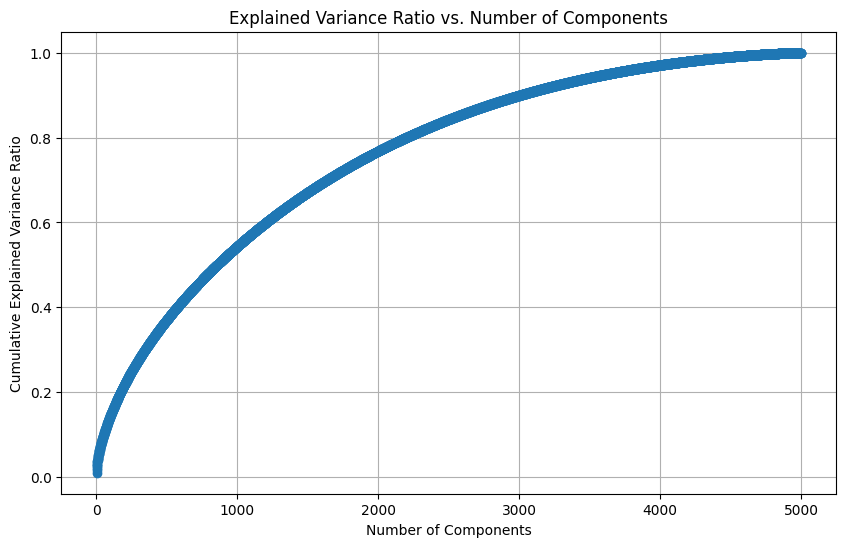

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())

# Apply PCA
n_components = 5000
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
# Use the determined number of components
n_components = 5000
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ***apprentissage non supervisé***

# **Kmeans**

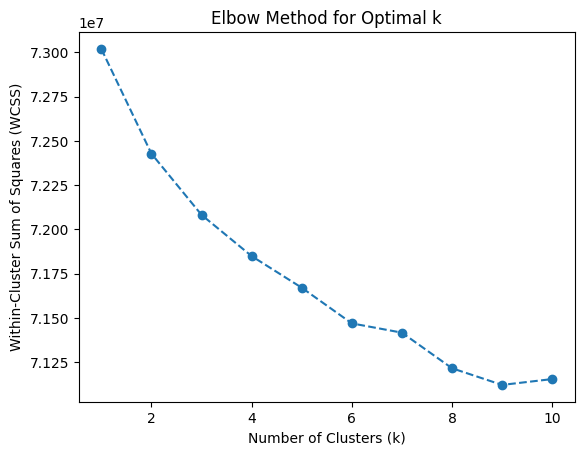

Cluster Sizes:
3    944
5    868
2    690
0    563
1    537
4     50
dtype: int64


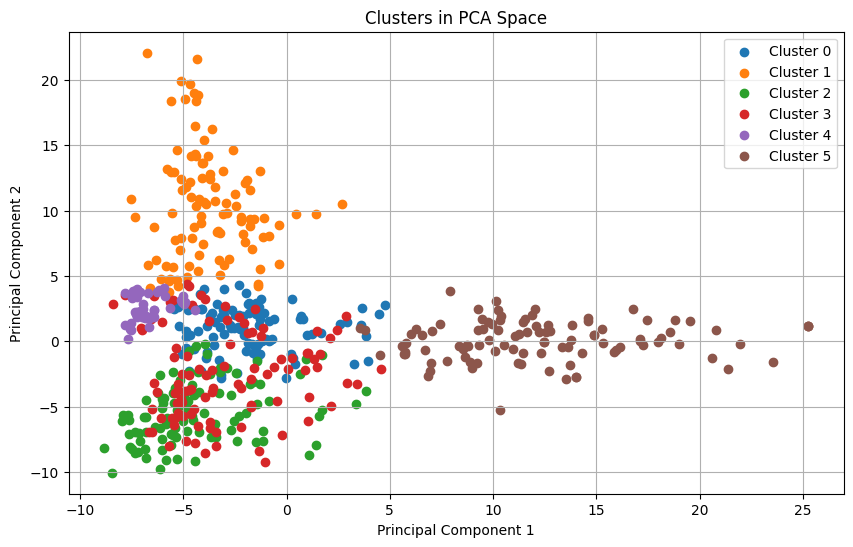

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que X_train_pca contient vos données réduites en dimension après ACP

# Appliquer la méthode du coude pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Choisissez le nombre optimal de clusters en fonction du coude dans la courbe (ici, supposons que le coude se trouve à k=3)

# Appliquer K-Means avec le nombre optimal de clusters
optimal_k = 6
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_optimal.fit(X_train_pca)

# Prédire les clusters pour les données de test
clusters_test = kmeans_optimal.predict(X_test_pca)

# Imprimer des informations sur les clusters
print('Cluster Sizes:')
print(pd.Series(clusters_test).value_counts())

# Visualiser les clusters dans l'espace PCA
plt.figure(figsize=(10, 6))
for cluster_id in range(optimal_k):
    cluster_samples = X_test_pca[clusters_test == cluster_id][:100]  # Plot up to 100 samples per cluster
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {cluster_id}')

plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# **RMSE,MSE**

In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming y_true contains synthetic ground truth labels for your test data
y_true = np.random.randint(0, optimal_k, size=len(X_test_pca))

# Calculate RMSE and MSE for each cluster
for cluster_id in range(optimal_k):
    cluster_indices = (clusters_test == cluster_id)
    y_cluster_true = y_true[cluster_indices]

    # Assuming you have some cluster-specific predictions or assignments
    # Replace the following line with your actual predictions or cluster assignments
    y_cluster_pred = np.random.randint(0, optimal_k, size=len(y_cluster_true))  # Replace with your actual predictions

    rmse_cluster = np.sqrt(mean_squared_error(y_cluster_true, y_cluster_pred))
    mse_cluster = mean_squared_error(y_cluster_true, y_cluster_pred)

    print(f'Cluster {cluster_id} - RMSE: {rmse_cluster:.4f}, MSE: {mse_cluster:.4f}')

# Calculate overall RMSE and MSE for the entire dataset
rmse_total = np.sqrt(mean_squared_error(y_true, clusters_test))
mse_total = mean_squared_error(y_true, clusters_test)

print(f'\nTotal - RMSE: {rmse_total:.4f}, MSE: {mse_total:.4f}')


Cluster 0 - RMSE: 2.4203, MSE: 5.8579
Cluster 1 - RMSE: 2.3636, MSE: 5.5866
Cluster 2 - RMSE: 2.3517, MSE: 5.5304
Cluster 3 - RMSE: 2.4367, MSE: 5.9375
Cluster 4 - RMSE: 2.6230, MSE: 6.8800
Cluster 5 - RMSE: 2.4450, MSE: 5.9781

Total - RMSE: 2.4114, MSE: 5.8146


# **Hierarchical Clustering**

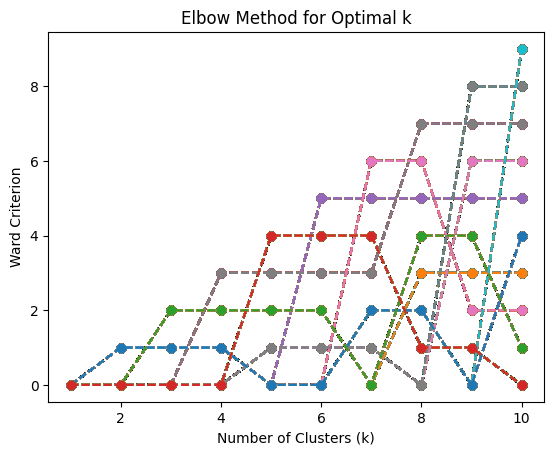

Cluster Sizes:
5    1542
2     763
1     532
4     395
0     371
3      49
dtype: int64


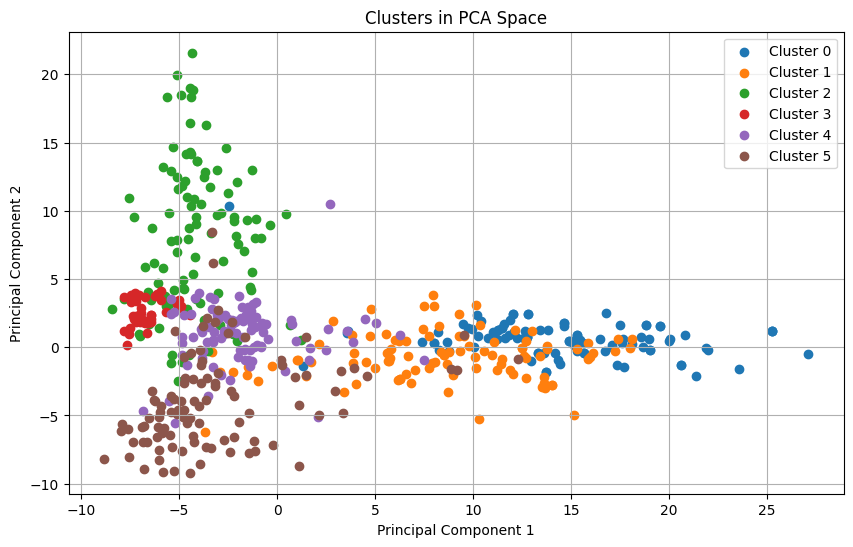

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que X_train_pca contient vos données réduites en dimension après ACP

# Appliquer la méthode du coude pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    agglomerative = AgglomerativeClustering(n_clusters=i)
    agglomerative.fit(X_train_pca)
    # Utilisation du critère de Ward pour évaluer la qualité du clustering
    wcss.append(agglomerative.labels_)

# Tracer la courbe du coude
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Ward Criterion')
plt.show()

# Choisissez le nombre optimal de clusters en fonction du coude dans la courbe
# Ici, supposons que le coude se trouve à k=3
optimal_k = 6

# Appliquer le clustering hiérarchique avec le nombre optimal de clusters
agglomerative_optimal = AgglomerativeClustering(n_clusters=optimal_k)
agglomerative_optimal.fit(X_train_pca)

# Prédire les clusters pour les données de test
clusters_test = agglomerative_optimal.fit_predict(X_test_pca)

# Imprimer des informations sur les clusters
print('Cluster Sizes:')
print(pd.Series(clusters_test).value_counts())

# Visualiser les clusters dans l'espace PCA
plt.figure(figsize=(10, 6))
for cluster_id in range(optimal_k):
    cluster_samples = X_test_pca[clusters_test == cluster_id][:100]  # Plot up to 100 samples per cluster
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {cluster_id}')

plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_pca contains your dimension-reduced data after PCA
# Assuming you have ground truth labels (for demonstration purposes)
ground_truth_labels = np.random.randint(0, optimal_k, size=len(X_test_pca))

# Apply hierarchical clustering with the optimal number of clusters
agglomerative_optimal = AgglomerativeClustering(n_clusters=optimal_k)
agglomerative_optimal.fit(X_train_pca)

# Predict clusters for the test data
clusters_test = agglomerative_optimal.fit_predict(X_test_pca)

# Calculate MSE and RMSE
mse = mean_squared_error(ground_truth_labels, clusters_test)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Mean Squared Error (MSE): 6.7399
Root Mean Squared Error (RMSE): 2.5961


# **Gaussian Mixture Models, GMM**

<ipython-input-53-e5181bcdba65>:30: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = plt.matplotlib.patches.Ellipse(mean[:2], v[0], v[1], 180.0 + angle, color='black', alpha=0.3)


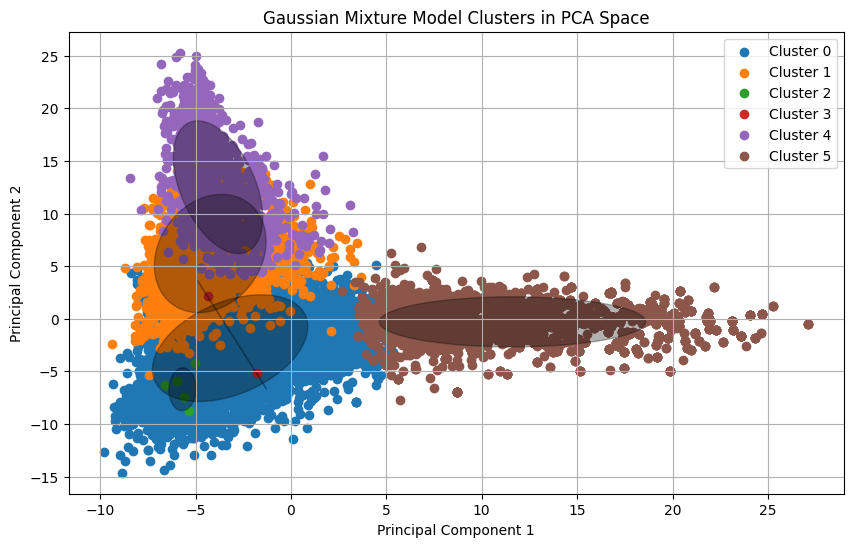

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que X_train_pca contient vos données réduites en dimension après ACP

# Appliquer le modèle de mélange gaussien (GMM)
gmm = GaussianMixture(n_components=6, covariance_type='full')  # Vous pouvez ajuster le nombre de composants
gmm.fit(X_train_pca)
clusters = gmm.predict(X_train_pca)

# Visualiser les clusters dans l'espace PCA
plt.figure(figsize=(10, 6))
unique_labels = set(clusters)
for label in unique_labels:
    cluster_samples = X_train_pca[clusters == label]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {label}')

# Tracer les ellipses de covariance du GMM
for i in range(len(gmm.means_)):
    mean = gmm.means_[i]
    cov_matrix = gmm.covariances_[i][:2, :2]  # Sélectionnez uniquement les deux premières colonnes/lignes pour la visualisation 2D
    v, w = np.linalg.eigh(cov_matrix)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi
    ell = plt.matplotlib.patches.Ellipse(mean[:2], v[0], v[1], 180.0 + angle, color='black', alpha=0.3)
    plt.gca().add_patch(ell)

plt.title('Gaussian Mixture Model Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train_pca contains your dimension-reduced data after PCA
# Assuming you have ground truth labels (for demonstration purposes)
ground_truth_labels = np.random.randint(0, 6, size=len(X_train_pca))  # Replace with your actual ground truth labels

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=6, covariance_type='full')
gmm.fit(X_train_pca)
clusters = gmm.predict(X_train_pca)
# Calculate MSE and RMSE
mse = mean_squared_error(ground_truth_labels, clusters)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Mean Squared Error (MSE): 5.7773
Root Mean Squared Error (RMSE): 2.4036


# **Isolation Forest**

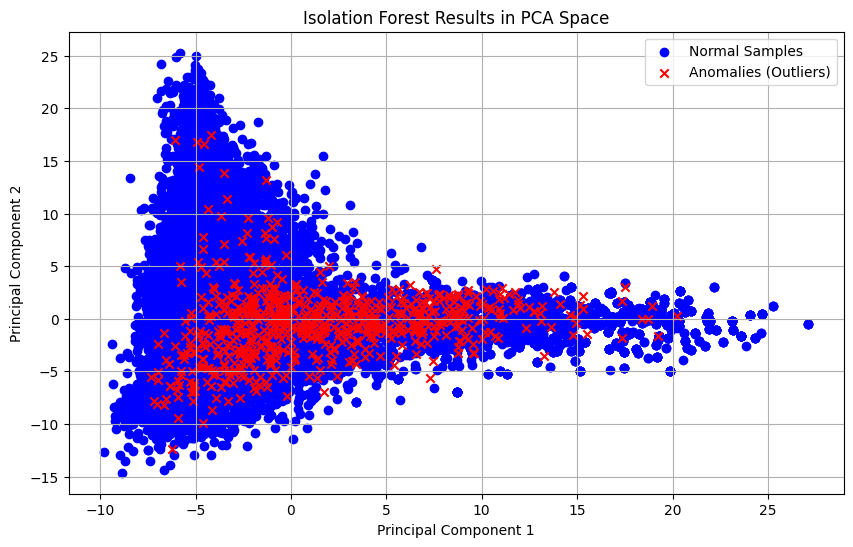

In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que X_train_pca contient vos données réduites en dimension après ACP

# Appliquer l'algorithme Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)  # Vous pouvez ajuster le taux de contamination
isolation_forest.fit(X_train_pca)
outliers = isolation_forest.predict(X_train_pca)

# Visualiser les résultats dans l'espace PCA
plt.figure(figsize=(10, 6))

# Points normaux
normal_samples = X_train_pca[outliers == 1]
plt.scatter(normal_samples[:, 0], normal_samples[:, 1], label='Normal Samples', color='blue')

# Points considérés comme des anomalies (outliers)
anomalies = X_train_pca[outliers == -1]
plt.scatter(anomalies[:, 0], anomalies[:, 1], label='Anomalies (Outliers)', color='red', marker='x')

plt.title('Isolation Forest Results in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# **6.Classification:**

# **SVM classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Train your classifier on the PCA-transformed data
svm_classifier_pca = SVC(kernel='linear', C=1, probability=True)
svm_classifier_pca.fit(X_train_pca, y_train)

# Predict on the test data
predictions_pca = svm_classifier_pca.predict(X_test_pca)

# Evaluate the model with PCA
accuracy_pca = accuracy_score(y_test, predictions_pca)
print(f'Accuracy with PCA: {accuracy_pca:.2%}')

Accuracy with PCA: 91.40%


**3. Train a Machine Learning Model**

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1, probability=True)  # You can adjust parameters

# Train the model
svm_classifier.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear', probability=True)

**4. Make Predictions**

In [ ]:
# Predict on the test data
predictions = svm_classifier.predict(X_test_tfidf)

**5. Evaluate the Model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions))

# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions))

Accuracy: 93.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       641
           1       0.93      0.91      0.92       499
           2       0.98      0.99      0.99       798
           3       0.98      1.00      0.99       700
           4       0.88      0.84      0.86       672
           5       0.94      0.95      0.94       342

    accuracy                           0.93      3652
   macro avg       0.93      0.93      0.93      3652
weighted avg       0.93      0.93      0.93      3652


Confusion Matrix:
[[583   2   1   0  49   6]
 [  6 452   2   5  22  12]
 [  0   2 788   0   5   3]
 [  0   1   0 698   1   0]
 [ 68  22   9   6 566   1]
 [  6   8   1   0   2 325]]


# **7.Use the Model to Predict Categories for New Articles**

In [ ]:
new_article_text = """
تقرير: الابتكار والتكنولوجيا في علم الحوسبة السحابية

في عالم متسارع التطور التكنولوجي، يلعب الابتكار والتكنولوجيا دورًا حاسمًا في تحسين العديد من القطاعات، وعلم الحوسبة السحابية يعد من بين أبرز المجالات التي استفادت بشكل كبير من هذا التقدم. يساهم الابتكار في تطوير حلول فعّالة ومستدامة لتحسين أداء الأنظمة السحابية وتحسين تجربة المستخدم.

تقنيات الحوسبة السحابية تعتمد على استخدام موارد الحاسوب والتخزين عبر الإنترنت، مما يوفر مرونة أكبر وتحسين الإدارة والاستفادة الأمثل من الموارد. يتيح الابتكار في هذا المجال استكشاف طرق جديدة لتحسين أمان البيانات، وتحقيق أداء أفضل، وتحسين استجابة الأنظمة.

عند تصميم حلول الحوسبة السحابية، يجب أخذ التكنولوجيا والابتكار في اعتبارك. تطوير أنظمة ذكية ومتقدمة يعزز من قدرة الأعمال على التكيف مع التحديات المستقبلية. يمكن للابتكار والتكنولوجيا الحديثة تحويل الطريقة التي ننظر بها إلى الحوسبة السحابية وتحقيق تطور فعّال.
"""

In [ ]:
# Assuming you have a mapping between numerical labels and category names
label_to_category = {
    0: 'articlesEconomy',
    1: 'articlesCulture',
    2: 'articlesSports',
    3: 'articlesReligion',
    4: 'articlesLocal',
    5: 'articlesInternational'
}
# Preprocess the new article text
preprocessed_new_article = preprocess_arabic_text(new_article)

# Use the same TF-IDF vectorizer instance you used for training data
new_article_tfidf = tfidf_vectorizer.transform([preprocessed_new_article])
# Predict the category for the new article
predicted_label = svm_classifier.predict(new_article_tfidf)[0]
predicted_category = label_to_category[predicted_label]

print(f'Predicted Category: {predicted_category}')

Predicted Category: articlesCulture


**5. Evaluate the Model**

# **KNN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an instance of KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
predictions_knn = knn_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f'Accuracy with KNN: {accuracy_knn:.2%}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions_knn))

# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions_knn))

Accuracy with KNN: 88.86%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       641
           1       0.88      0.80      0.84       499
           2       0.96      0.97      0.97       798
           3       0.89      1.00      0.94       700
           4       0.86      0.78      0.82       672
           5       0.89      0.85      0.87       342

    accuracy                           0.89      3652
   macro avg       0.88      0.88      0.88      3652
weighted avg       0.89      0.89      0.89      3652


Confusion Matrix:
[[555   6   3   5  49  23]
 [ 14 399   7  50  20   9]
 [  1   3 777   2  11   4]
 [  0   1   0 699   0   0]
 [ 81  33  14  20 523   1]
 [ 16  14   6  10   4 292]]


# **8.Use the Model to Predict Categories for New Articles**

In [ ]:
new_article = """
الله تبارك وتعالى
واضرب لهم مثل الحياة الدنيا كماء أنزلناه من السماء فاختلط به نبات الأرض فأصبح هشيما تذروه الرياح وكان الله على كل شيء مقتدرا

معنى الآية الكريمة:
تقول الآية إن الحياة الدنيا مثل الماء الذي أنزله الله من السماء، حيث اختلط بنبات الأرض وأصبح هشيما يذره الرياح. وهذا يعبر عن مفهوم الحياة الدنيا وقصرها وهشاشتها، حيث يتغير كل شيء فيها وتمر بتحولات دائمة. وفي النهاية، يؤكد الله أنه على كل شيء قدير ومتسلط.

تفسير الآية:
الآية تحمل معاني عميقة في التفكير في الحياة وفهمها. تشبه الحياة بالماء الذي يأتي من السماء، وهو رحمة من الله. لكنها في نهاية المطاف تصبح هشيما يتناثر بفعل الرياح، مما يظهر ضعفها وهشاشتها. هذا يشير إلى أن الدنيا هي مرحلة مؤقتة ومتغيرة، والحقيقة الثابتة هي قدرة الله على كل شيء.

يمكن أن يستفاد من هذه الآية للتأمل في طبيعة الحياة وأهمية التوجه نحو الأمور الروحية والأبدية بدلاً من الاهتمام الكبير بالأمور الدنيوية التي قد تكون هشيما وتتغير بسرعة.
"""

In [ ]:
label_to_category = {
    0: 'articlesEconomy',
    1: 'articlesCulture',
    2: 'articlesSports',
    3: 'articlesReligion',
    4: 'articlesLocal',
    5: 'articlesInternational'
}
# Preprocess the new_article
preprocessed_new_article = preprocess_arabic_text(new_article)  # Assuming you have a preprocess_text function

# Vectorize the preprocessed_new_article using the same TF-IDF vectorizer
new_article_tfidf = tfidf_vectorizer.transform([preprocessed_new_article])

# Predict using the trained KNN model
predicted_category = knn_classifier.predict(new_article_tfidf)

# Map the predicted category index to the actual category name
predicted_category_name = label_to_category[predicted_category[0]]  # Assuming you have a list of target_names

# Print the predicted category
print(f'Predicted Category: {predicted_category_name}')

Predicted Category: articlesReligion


# **Using Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
predictions_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'Accuracy with Random Forest: {accuracy_rf:.2%}')

# Print classification report
print('\nClassification Report (Random Forest):')
print(classification_report(y_test, predictions_rf))

# Print confusion matrix
print('\nConfusion Matrix (Random Forest):')
print(confusion_matrix(y_test, predictions_rf))

# Predict using the trained Random Forest model for the new_article
predicted_category_rf = rf_classifier.predict(new_article_tfidf)
predicted_category_name_rf = label_to_category[predicted_category_rf[0]]
print(f'Predicted Category (Random Forest): {predicted_category_name_rf}')

Accuracy with Random Forest: 90.85%

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       641
           1       0.88      0.84      0.86       499
           2       0.97      0.98      0.98       798
           3       0.98      1.00      0.99       700
           4       0.84      0.84      0.84       672
           5       0.88      0.92      0.90       342

    accuracy                           0.91      3652
   macro avg       0.90      0.90      0.90      3652
weighted avg       0.91      0.91      0.91      3652


Confusion Matrix (Random Forest):
[[542  15   2   2  59  21]
 [  9 418   6   7  42  17]
 [  3   1 784   0   7   3]
 [  0   2   0 698   0   0]
 [ 62  28  12   7 563   0]
 [ 12  12   2   0   3 313]]
Predicted Category (Random Forest): articlesCulture


# **Using Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
lr_classifier = LogisticRegression(max_iter=100, random_state=42)

# Train the model
lr_classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
predictions_lr = lr_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, predictions_lr)
print(f'Accuracy with Logistic Regression: {accuracy_lr:.2%}')

# Print classification report
print('\nClassification Report (Logistic Regression):')
print(classification_report(y_test, predictions_lr))

# Print confusion matrix
print('\nConfusion Matrix (Logistic Regression):')
print(confusion_matrix(y_test, predictions_lr))

# Predict using the trained Logistic Regression model for the new_article
predicted_category_lr = lr_classifier.predict(new_article_tfidf)
predicted_category_name_lr = label_to_category[predicted_category_lr[0]]
print(f'Predicted Category (Logistic Regression): {predicted_category_name_lr}')

Accuracy with Logistic Regression: 92.96%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       641
           1       0.93      0.89      0.91       499
           2       0.98      0.98      0.98       798
           3       0.97      0.99      0.98       700
           4       0.86      0.86      0.86       672
           5       0.94      0.95      0.94       342

    accuracy                           0.93      3652
   macro avg       0.93      0.93      0.93      3652
weighted avg       0.93      0.93      0.93      3652


Confusion Matrix (Logistic Regression):
[[577   3   1   0  52   8]
 [  9 442   3   9  27   9]
 [  3   2 779   1   8   5]
 [  0   1   0 696   3   0]
 [ 58  19   8  10 577   0]
 [  7   7   1   0   3 324]]
Predicted Category (Logistic Regression): articlesSports


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **comparaison des model **

Accuracy with SVM with PCA: 91.40%
Accuracy with SVM: 93.43%
Accuracy with KNN: 88.86%
Accuracy with Random Forest: 90.85%
Accuracy with Logistic Regression: 92.96%


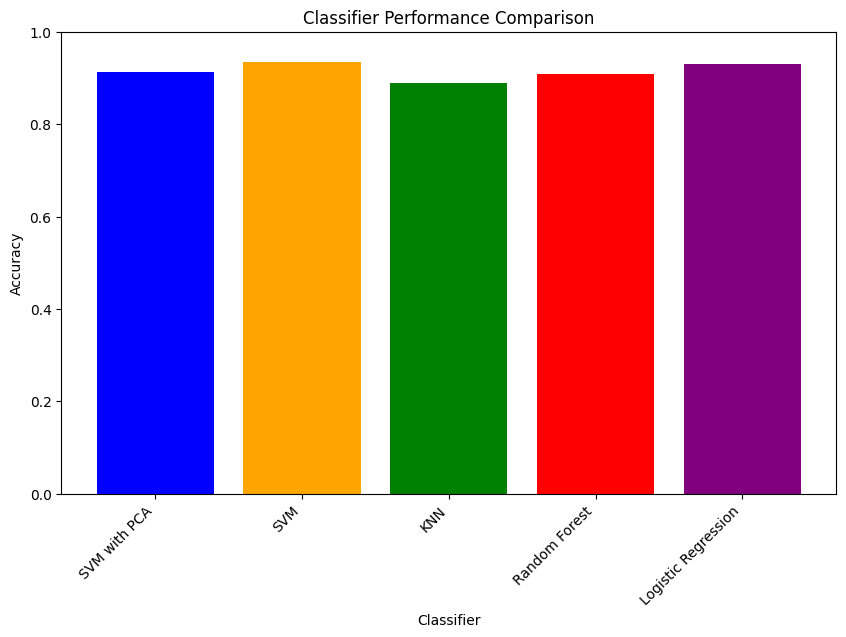

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define the classifiers and their names
classifiers = [svm_classifier_pca, svm_classifier, knn_classifier, rf_classifier, lr_classifier]
classifier_names = ['SVM with PCA', 'SVM', 'KNN', 'Random Forest', 'Logistic Regression']

# Initialize lists to store accuracy scores
accuracies = []

# Evaluate each classifier and store the accuracy
for clf, name in zip(classifiers, classifier_names):
    if 'pca' in name.lower():
        predictions = clf.predict(X_test_pca)
    else:
        predictions = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f'Accuracy with {name}: {accuracy:.2%}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Classifier Performance Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
